In [1]:
import pandas as pd
import h5py
import fitsio
import numpy as np
import matplotlib.pyplot as plt

import math, time
import sys
import numpy as np
import astropy.io.fits as pyfits

import numpy as np, time, astropy.io.fits, os, sys

In [50]:
def read_realdata_alldata(path_real, fname, nfields): 
    
    ra_all = []
    dec_all = [] 
    obj_id_all = []
    sigmae_all  = []
    erms_all = [] 
    weights_all = []
    m_all = [] 
    c1_all = [] 
    c2_all = []
    res_all = []
    flux_all = []
    zbin_all = []
    bmask_all= []
    psf11_all= []
    psf22_all= [] 
    psf12_all= []
    epsf1_all= []
    epsf2_all = [] 
    e1_all =[] 
    e2_all = []
    
    for j in range(nfields):
 

        from astropy.table import Table
        table_ = Table.read(path_real+'hscy3_shape_chopped_'+fname+'_'+str(j)+'.fits', format='fits')
        data = table_.to_pandas()
        
        data = data[data['hsc_y3_zbin'] != 0]
         
          
        e1      = np.array(data["i_hsmshaperegauss_e1"])
        e1_all.append(e1)
        e2      = np.array(data["i_hsmshaperegauss_e2"])
        e2_all.append(e2)
        # Mock and real catalogs share the information below
        # RA in degree
        ra      = np.array(data["i_ra"])
        ra_all.append(ra)
         
        # DEC in degree
        dec     = np.array(data["i_dec"])
        dec_all.append(dec)
        # object_id to be cross matched to get photometric redshifts for individual objects.
        obj_id  = np.array(data["object_id"])
        obj_id_all.append(obj_id)
        # per-component shape measurement uncertainty
        sigmae  = np.array(data["i_hsmshaperegauss_derived_sigma_e"])
        sigmae_all.append(sigmae)
        # per-component RMS ellipticity estimate
        erms    = np.array(data["i_hsmshaperegauss_derived_rms_e"])
        erms_all.append(erms)
        # Weight factor to be used for lensing calculations, corresponding to inverse variance weighting based on shape uncertainty
        weights = np.array(data["i_hsmshaperegauss_derived_weight"])
        weights_all.append(weights)
        # Multiplicative bias factor effectively averaged over components
        m  = np.array(data["i_hsmshaperegauss_derived_shear_bias_m"])
        m_all.append(m)
        #print(np.shape(m),'----')
        # Additive bias factor with a value for each component
        c1      = np.array(data["i_hsmshaperegauss_derived_shear_bias_c1"])
        c1_all.append(c1)
        c2      = np.array(data["i_hsmshaperegauss_derived_shear_bias_c2"])
        c2_all.append(c2)
        # The resolution compared to the PSF with which the galaxy was detected
        res     = np.array(data["i_hsmshaperegauss_resolution"])
        res_all.append(res)
        # The flux in aperture with radius 1 arcsec
        flux    = np.array(data["i_apertureflux_10_mag"])
        flux_all.append(flux)
        # the redshift bin for the HSC Y3 cosmic shear analysis (We have to use the objects with zbin=1,2,3,4. The objects with zbin==0 should be removed)
        zbin    = np.array(data["hsc_y3_zbin"])
        zbin_all.append(zbin)
        
        # mask to remove the region with large B-mode
        bmask   = np.array(data["b_mode_mask"])
        bmask_all.append(bmask)
        # PSF moments that is used to correct additive selection bias
        psf11   = np.array(data["i_sdssshape_psf_shape11"])
        psf11_all.append(psf11)
        
        psf22   = np.array(data["i_sdssshape_psf_shape22"])
        psf22_all.append(psf22)
        psf12   = np.array(data["i_sdssshape_psf_shape12"])
        psf12_all.append(psf12)
        
        epsf1   = (psf11-psf22)/(psf11+psf22)
        epsf1_all.append(epsf1)
        epsf2   = (2*psf12)/(psf11+psf22)
        epsf2_all.append(epsf2)
        
 

        #print(np.shape(np.hstack(sigmae)))
    return np.hstack(e1_all) , np.hstack(e2_all), np.hstack(ra_all),np.hstack(dec_all), np.hstack(obj_id_all), np.hstack(sigmae_all), np.hstack(erms_all), np.hstack(weights_all), np.hstack(m_all), np.hstack(c1_all),np.hstack(c2_all), np.hstack(res_all), np.hstack(flux_all), np.hstack(zbin_all), np.hstack(bmask_all), np.hstack(psf11_all), np.hstack(psf22_all),np.hstack(psf12_all), np.hstack(epsf1_all), np.hstack(epsf2_all)





def read_mockdata_alldata(fname, nfields ):
    from astropy.table import Table
    
    ra_all = []
    dec_all = [] 
    obj_id_all = []
    sigmae_all  = []
    erms_all = [] 
    weights_all = []
    m_all = [] 
    c1_all = [] 
    c2_all = []
    res_all = []
    flux_all = []
    zbin_all = []
    bmask_all = []
    psf11_all = []
    psf22_all = [] 
    psf12_all = []
    epsf1_all = []
    epsf2_all = [] 
    shear1_all = []
    shear2_all= [] 
    kappa_all = []
    e1_mock_all = []
    e2_mock_all = []
    e1_int_all = []
    e2_int_all= []
    e1_mea_all= [] 
    e2_mea_all = []
    zs_mock_all = []
    
    for j in range(nfields):

        table_ = Table.read(fname+str(j)+'.fits', format='fits')
        data = table_.to_pandas()
        data.dropna(subset=["e1_mock_with_zero_m"], inplace=True)
        data = data[data['hsc_y3_zbin'] != 0]

         
        
        # Mock and real catalogs share the information below
        # RA in degree
        ra      = np.array(data["ra_mock"])
        ra_all.append(ra)
         
        # DEC in degree
        dec     = np.array(data["dec_mock"])
        dec_all.append(dec)
        # object_id to be cross matched to get photometric redshifts for individual objects.
        obj_id  = np.array(data["object_id"])
        obj_id_all.append(obj_id)
        # per-component shape measurement uncertainty
        sigmae  = np.array(data["i_hsmshaperegauss_derived_sigma_e"])
        sigmae_all.append(sigmae)
        # per-component RMS ellipticity estimate
        erms    = np.array(data["i_hsmshaperegauss_derived_rms_e"])
        erms_all.append(erms)
        # Weight factor to be used for lensing calculations, corresponding to inverse variance weighting based on shape uncertainty
        weights = np.array(data["i_hsmshaperegauss_derived_weight"])
        weights_all.append(weights)
        # Multiplicative bias factor effectively averaged over components
        m  = np.array(data["i_hsmshaperegauss_derived_shear_bias_m"])
        m_all.append(m)
        #print(np.shape(m),'----')
        # Additive bias factor with a value for each component
        c1      = np.array(data["i_hsmshaperegauss_derived_shear_bias_c1"])
        c1_all.append(c1)
        c2      = np.array(data["i_hsmshaperegauss_derived_shear_bias_c2"])
        c2_all.append(c2)
        # The resolution compared to the PSF with which the galaxy was detected
        res     = np.array(data["i_hsmshaperegauss_resolution"])
        res_all.append(res)
        # The flux in aperture with radius 1 arcsec
        flux    = np.array(data["i_apertureflux_10_mag"])
        flux_all.append(flux)
        # the redshift bin for the HSC Y3 cosmic shear analysis (We have to use the objects with zbin=1,2,3,4. The objects with zbin==0 should be removed)
        zbin    = np.array(data["hsc_y3_zbin"])
        zbin_all.append(zbin)
        
        # mask to remove the region with large B-mode
        bmask   = np.array(data["b_mode_mask"])
        bmask_all.append(bmask)
        # PSF moments that is used to correct additive selection bias
        psf11   = np.array(data["i_sdssshape_psf_shape11"])
        psf11_all.append(psf11)
        
        psf22   = np.array(data["i_sdssshape_psf_shape22"])
        psf22_all.append(psf22)
        psf12   = np.array(data["i_sdssshape_psf_shape12"])
        psf12_all.append(psf12)
        
        epsf1   = (psf11-psf22)/(psf11+psf22)
        epsf1_all.append(epsf1)
        epsf2   = (2*psf12)/(psf11+psf22)
        epsf2_all.append(epsf2)
        

        # If you read mock catalogs
        # lensing shear1/2
        shear1  = np.array(data["shear1_sim"])
        shear1_all.append(shear1)
        shear2  = np.array(data["shear2_sim"])
        shear2_all.append(shear2)
        # lensing convergence
        kappa   = np.array(data["kappa"])
        kappa_all.append(kappa)
        # mock e1/e2 (assumed the multiplicative/additive biases to be zero)
        # Note mock catalogs do not have the columns of i_hsmshaperegauss_e1 and i_hsmshaperegauss_e2.
        e1_mock = np.array(data["e1_mock_with_zero_m"])
        e1_mock_all.append(e1_mock)
        
        e2_mock = np.array(data["e2_mock_with_zero_m"])
        e2_mock_all.append(e2_mock)
        # intrinsic shapes
        e1_int  = np.array(data["noise_int1"])
        e1_int_all.append(e1_int)
        e2_int  = np.array(data["noise_int2"])
        e2_int_all.append(e2_int)
        # measurement noises
        e1_mea  = np.array(data["noise_mea1"])
        e1_mea_all.append(e1_mea)
        e2_mea  = np.array(data["noise_mea2"])
        e2_mea_all.append(e2_mea)
        # source redshift
        zs_mock = np.array(data["z_source_mock"])
        zs_mock_all.append(zs_mock)
    
    return np.hstack(ra_all),np.hstack(dec_all), np.hstack(obj_id_all), np.hstack(sigmae_all), np.hstack(erms_all), np.hstack(weights_all), np.hstack(m_all), np.hstack(c1_all),np.hstack(c2_all), np.hstack(res_all), np.hstack(flux_all), np.hstack(zbin_all), np.hstack(bmask_all), np.hstack(psf11_all), np.hstack(psf22_all),np.hstack(psf12_all), np.hstack(epsf1_all), np.hstack(epsf2_all),np.hstack(shear1_all), np.hstack(shear2_all), np.hstack(kappa_all),np.hstack(e1_mock_all), np.hstack(e2_mock_all), np.hstack(e1_int_all), np.hstack(e2_int_all), np.hstack(e1_mea_all), np.hstack(e2_mea_all), np.hstack(zs_mock_all)





# When working on real catalogs, we need some calibrations to get an unbiased shear as below
def calib_shear(weights, m, erms, e1, e2, c1, c2, flux, res, epsf1, epsf2):

    # set the shear responsibity
    resp = 1. - np.average(erms**2, weights= weights)
    
    # correct the multiplicative and additive biases
    mhat = np.average(m, weights= weights)
    e1_hat = (e1/(2.*resp) - c1) / (1 + mhat)
    e2_hat = (e2/(2.*resp) - c2) / (1 + mhat)

    # correct selection bias
    weights_sum = np.sum(weights)
    weights_sum_conditioned_aperture_flux = np.sum(np.where(flux > 25.5-0.025, weights, 0.0))
    weights_sum_conditioned_resolution    = np.sum(np.where(res  < 0.3+0.01, weights, 0.0))

    p_edge_ap = weights_sum_conditioned_aperture_flux / weights_sum
    p_edge_re = weights_sum_conditioned_resolution    / weights_sum

    # section 3.7 in https://arxiv.org/pdf/2107.00136
    mselec = -0.05854 * p_edge_ap + 0.01919 * p_edge_re
    aselec = +0.00635 * p_edge_ap + 0.00627 * p_edge_re
    
    e1_hat = (e1_hat - aselec * epsf1) / (1.0+mselec)
    e2_hat = (e2_hat - aselec * epsf2) / (1.0+mselec)
    
    return e1_hat, e2_hat

# When working on mock catalogs, we need the correction based on the shear responsivity alone
def calib_shear_mock(weights, erms, e1_mock, e2_mock):

    # set the shear responsibity
    resp = 1. - np.average(erms**2, weights= weights)
    print(resp)
    e1_hat = e1_mock/(2.*resp)
    e2_hat = e2_mock/(2.*resp)

    return e1_hat, e2_hat



import copy

def create_shear_map(ra, dec, g1, g2, flat_obj, weights=None):
    """
    Creates two maps containing the weighted average of the g1, g2 components (spin-2).
    Parameters
    ----------
    ra: right ascention
    dec : declination
    g1 : gamma1 component
    g2 : gamma2 component
    flat_obj: flat object
    weights: galaxy shape weights
    return:
    gamma1 map, gamma2 map, density map and mask
    """

    flatmap = flat_obj.pos2pix(ra, dec)
    id_good = flatmap >= 0

    if weights is not None:
        g1 = weights*copy.deepcopy(g1)
        g2 = weights*copy.deepcopy(g2)
    else:
        weights = weights[id_good]

    g1_map = np.bincount(flatmap[id_good],
                       weights= g1[id_good],
                       minlength= flat_obj.get_npix())
    g2_map = np.bincount(flatmap[id_good],
                       weights= g2[id_good],
                       minlength= flat_obj.get_npix())

    #g2_map *= (-1.) #apply shear transformation- this is important to be accordingly with the spin definition- see namaster docs, for example!
    weightsmap = np.bincount(flatmap[id_good],
                             weights= weights[id_good],
                             minlength= flat_obj.get_npix())
    weightmask = weightsmap

    nmap = np.bincount(flatmap[id_good],
                       weights=None,
                       minlength=flat_obj.get_npix())

    g1_map[weightsmap != 0] /= weightsmap[weightsmap != 0] #avoid division by zeros
    g2_map[weightsmap != 0] /= weightsmap[weightsmap != 0]

    if weights is not None:
        mask = weightsmap != 0.
        mask = mask.astype('int')
    else:
        mask = weightsmap != 0.
        mask = mask.astype('int')
        weightmask = copy.deepcopy(mask)


    shear_maps = [g1_map, g2_map]
    masks_dens = [mask, nmap]

    return shear_maps, masks_dens






def KS_map(g1, g2):
    """Compute convergence maps from shear maps considering Kaiser-Squires inversion

    returns kappa_Emode and kappa_Bmode (imaginary part)
    """
    if g1.shape != g2.shape:
        raise ValueError("g1 and g2 maps don't have the same shape!")

    (nx,ny)= g1.shape

    # get frequencies
    k1, k2 = np.meshgrid(np.fft.fftfreq(ny),
                         np.fft.fftfreq(nx))

    g1_tilde = np.fft.fft2(g1)
    g2_tilde = np.fft.fft2(g2)
    denom = k1*k1 + k2*k2
    denom[0, 0] = 1  # avoid division by 0
    kap = ((k1*k1 - k2*k2) - 2j*(k1*k2)) * (g1_tilde + 1j*g2_tilde) / denom
    kap = np.fft.ifft2(kap)

    return np.real(kap), np.imag(kap)


import copy

def create_shear_map(ra, dec, g1, g2, flat_obj, weights=None):
    """
    Creates two maps containing the weighted average of the g1, g2 components (spin-2).
    Parameters
    ----------
    ra: right ascention
    dec : declination
    g1 : gamma1 component
    g2 : gamma2 component
    flat_obj: flat object
    weights: galaxy shape weights
    return:
    gamma1 map, gamma2 map, density map and mask
    """

    flatmap = flat_obj.pos2pix(ra, dec)
    id_good = flatmap >= 0

    if weights is not None:
        g1 = weights*copy.deepcopy(g1)
        g2 = weights*copy.deepcopy(g2)
    else:
        weights = weights[id_good]

    g1_map = np.bincount(flatmap[id_good],
                       weights= g1[id_good],
                       minlength= flat_obj.get_npix())
    g2_map = np.bincount(flatmap[id_good],
                       weights= g2[id_good],
                       minlength= flat_obj.get_npix())

    #g2_map *= (-1.) #apply shear transformation- this is important to be accordingly with the spin definition- see namaster docs, for example!
    weightsmap = np.bincount(flatmap[id_good],
                             weights= weights[id_good],
                             minlength= flat_obj.get_npix())
    weightmask = weightsmap

    nmap = np.bincount(flatmap[id_good],
                       weights=None,
                       minlength=flat_obj.get_npix())

    g1_map[weightsmap != 0] /= weightsmap[weightsmap != 0] #avoid division by zeros
    g2_map[weightsmap != 0] /= weightsmap[weightsmap != 0]

    if weights is not None:
        mask = weightsmap != 0.
        mask = mask.astype('int')
    else:
        mask = weightsmap != 0.
        mask = mask.astype('int')
        weightmask = copy.deepcopy(mask)


    shear_maps = [g1_map, g2_map]
    masks_dens = [mask, nmap]

    return shear_maps, masks_dens



def make_shear_and_kappa_maps_realdata_alldata(path, fname, nfield ): 
    
    from hsc_utils import map_utils as mu
    import astropy.units as u
    e1_cat,e2_cat, ra_cat,dec_cat, obj_id_cat, sigmae_cat, erms_cat, weights_cat, m_cat, c1_cat,c2_cat, res_cat, flux_cat, zbin_cat, bmask_cat, psf11_cat, psf22_cat,psf12_cat, epsf1_cat, epsf2_cat = read_realdata_alldata(path ,fname, nfield)
    pixel_scale= 0.5
    wcs, shape = mu.set_wcs_shape(ra_cat, dec_cat, pixel_scale, pad= 1.0)
    flat_obj = mu.FlatClass(wcs, nx= shape[0], ny= shape[1])
    map_size = [(np.max(ra_cat) - np.min(ra_cat)), (np.max(dec_cat) - np.min(dec_cat))]*u.degree
    
    print(np.shape(e1_cat), 'size real data cat')
    #calibrate shear
    e1_hat, e2_hat =  calib_shear(weights_cat, m_cat, erms_cat, e1_cat, e2_cat, c1_cat, c2_cat, flux_cat, res_cat, epsf1_cat, epsf2_cat)
    
    # #make the gamma-maps:
    [g1_map, g2_map], [mask, nmap] = create_shear_map(ra_cat,dec_cat,e1_hat, e2_hat, flat_obj, weights= weights_cat)
    
    mask_z = flat_obj.transform_mapsize(mask)
    g1_map = flat_obj.transform_mapsize(g1_map)
    g2_map = flat_obj.transform_mapsize(g2_map)
    return mask_z, g1_map, g2_map, map_size, e1_hat, e2_hat, weights_cat,flat_obj, ra_cat, dec_cat, nmap



def make_shear_and_kappa_maps_mocks_alldata(nfield): 
    from hsc_utils import map_utils as mu
    import astropy.units as u
    ra_mock,dec_mock, obj_id_mock, sigmae_mock, erms_mock, weights_mock, m_mock, c1_mock,c2_mock, res_mock, flux_mock, zbin_mock, bmask_mock, psf11_mock, psf22_mock,psf12_mock, epsf1_mock, epsf2_mock, shear1_mock, shear2_mock,kappa_mock, e1_mock, e2_mock,e1_int_mock, e2_int_mock,e1_mea_mock, e2_mea_mock, zs_mock  = read_mockdata_alldata(path_mock+'mock_hscy3_shape_chopped_XMM_', nfield)
    print(np.shape(ra_mock), 'size ra mock')
    e1_hat_mock, e2_hat_mock = calib_shear_mock(weights_mock, erms_mock, e1_mock, e2_mock)
    pixel_scale= 0.5
    wcs, shape = mu.set_wcs_shape(ra_mock, dec_mock, pixel_scale, pad= 1.0)
    flat_obj = mu.FlatClass(wcs, nx= shape[0], ny= shape[1])
    map_size = [(np.max(ra_mock) - np.min(ra_mock)), (np.max(dec_mock) - np.min(dec_mock))]*u.degree
    
    
    # # #make the gamma-maps:
    [g1_mock, g2_mock], [mask_mock, nmap_mock] = create_shear_map(ra_mock,dec_mock,e1_hat_mock, e2_hat_mock, flat_obj, weights= weights_mock)
    
    mask_mock = flat_obj.transform_mapsize(mask_mock)
    g1_mock = flat_obj.transform_mapsize(g1_mock)
    g2_mock = flat_obj.transform_mapsize(g2_mock)
    return mask_mock, g1_mock, g2_mock, map_size, e1_hat_mock, e2_hat_mock,  weights_mock,flat_obj, ra_mock, dec_mock,nmap_mock









import astropy.units as u

def get_smoothed_conv(g1_map, g2_map,map_size,flat_obj, mask,theta_g):
    """
    Smooth the shear components map (g1_map, g2_map) with a smoothing scale (theta_g) and transform into convergence maps KE and KB trought Kaiser-Squires transformation.
    If inpaint ==True, the shear components will be inpainted before the KS transformation.
    """
    smooth_in_pixel = (theta_g/60*u.degree * [flat_obj.nx, flat_obj.ny] / map_size).decompose().value
    #print(smooth_in_pixel,'smooth in pixel')
    # kernel =  get_kernel(smooth_in_pixel[0],smooth_in_pixel[1], Gaussian = False)
    #smooth the gamma-maps before do KS inversion:

    idx1= np.where(np.isnan(g1_map)==True)[0]
    idx2= np.where(np.isnan(g2_map)==True)[0]

    g1_map[idx1] = 0.0
    g2_map[idx2] = 0.0

    g1_hat = flat_obj.smooth_G(g1_map, smooth_in_pixel) #Gaussian convolution
    g2_hat = flat_obj.smooth_G(g2_map, smooth_in_pixel) 

    KE, KB = KS_map(g1_hat, -1*g2_hat)
    return KE, KB  




In [13]:
path_real = '/home/gabriela/Documents/Pesquisa/MG_HSC_official/data/real/'
mask_data, g1_data, g2_data, mapsize_data, g1_hat_data, g2_hat_data,  weights_data,flat_obj_data,ra_cat, dec_cat, nmap  = make_shear_and_kappa_maps_realdata_alldata(path_real,'XMM',8)


(1875312,) size real data cat


In [42]:
name_fields = ['XMM', 'VVDS','GAMA09H', 'GAMA15H', 'WIDE12H', 'HECTOMAP']
number_patches= [8, 25,23,7,26,13]

(1875312,) size real data cat
(5652119,) size real data cat
(5894274,) size real data cat
(2573993,) size real data cat
(7279084,) size real data cat
(2650656,) size real data cat


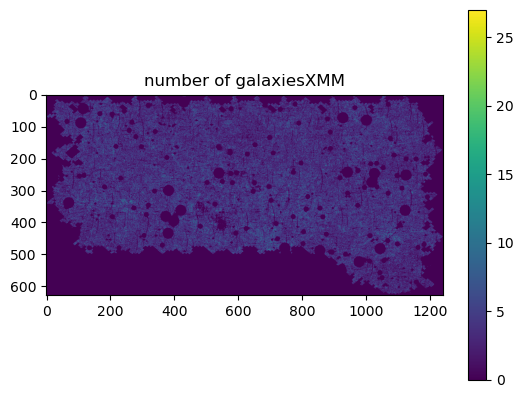

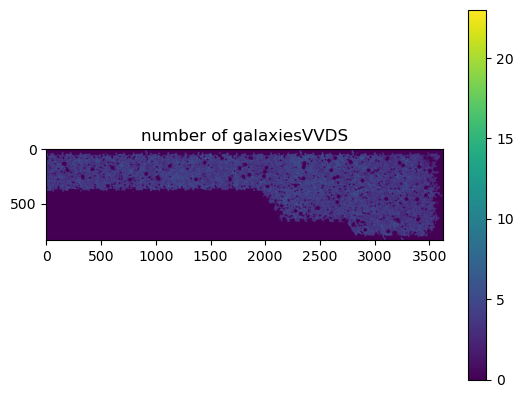

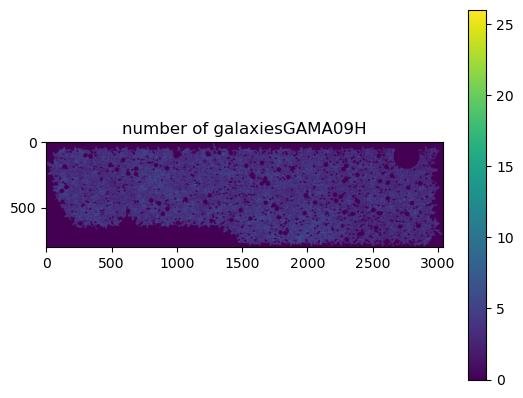

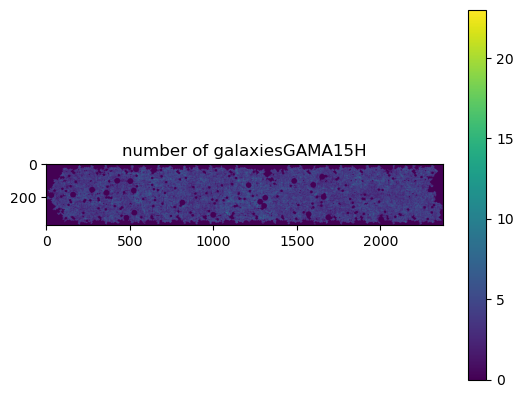

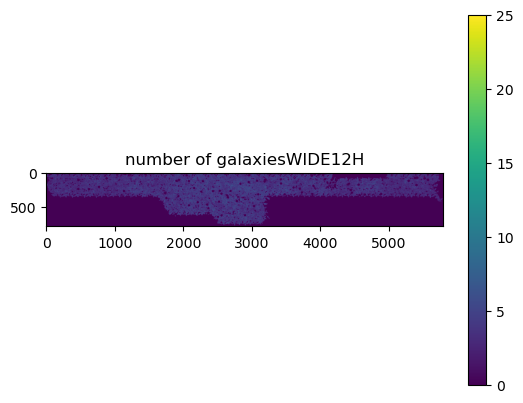

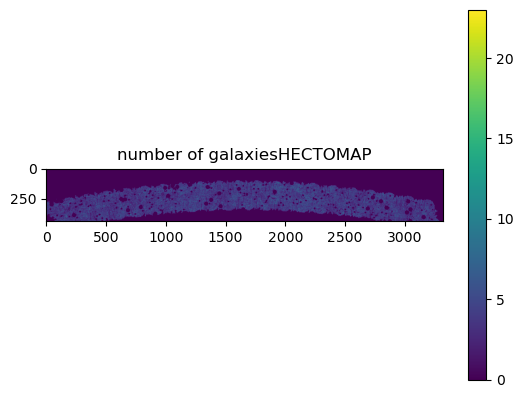

In [57]:
maps_all= []

x0s_min = []
x1s_min = []

x0s_max = []
x1s_max = []

istds_all =[]

for nn  in range(6):
    mask_data, g1_data, g2_data, mapsize_data, g1_hat_data, g2_hat_data,  weights_data,flat_obj_data,ra_cat, dec_cat, nmap  = make_shear_and_kappa_maps_realdata_alldata(path_real,name_fields[nn],number_patches[nn])
    #KE_data , KB_data= KS_map(g1_data, -1*g2_data)
    KE_data , KB_data = get_smoothed_conv(g1_data, g2_data, mapsize_data,flat_obj_data, mask_data,5)

    plt.figure()
    plt.imshow(flat_obj_data.transform_mapsize(nmap),cmap='viridis')
    plt.title('number of galaxies' +name_fields[nn] )
    plt.colorbar()
    #smooth convergence maps: 
    
    maps_all.append(KE_data*mask_data)

    istd = np.std(KE_data[mask_data!=0])
    istds_all.append(istd)

    x0s_max.append((np.max(ra_cat)))
    x0s_min.append((np.min(ra_cat)))
    x1s_max.append((np.max(dec_cat))) 
    x1s_min.append((np.min(dec_cat)))


# Make single plot with all fields:

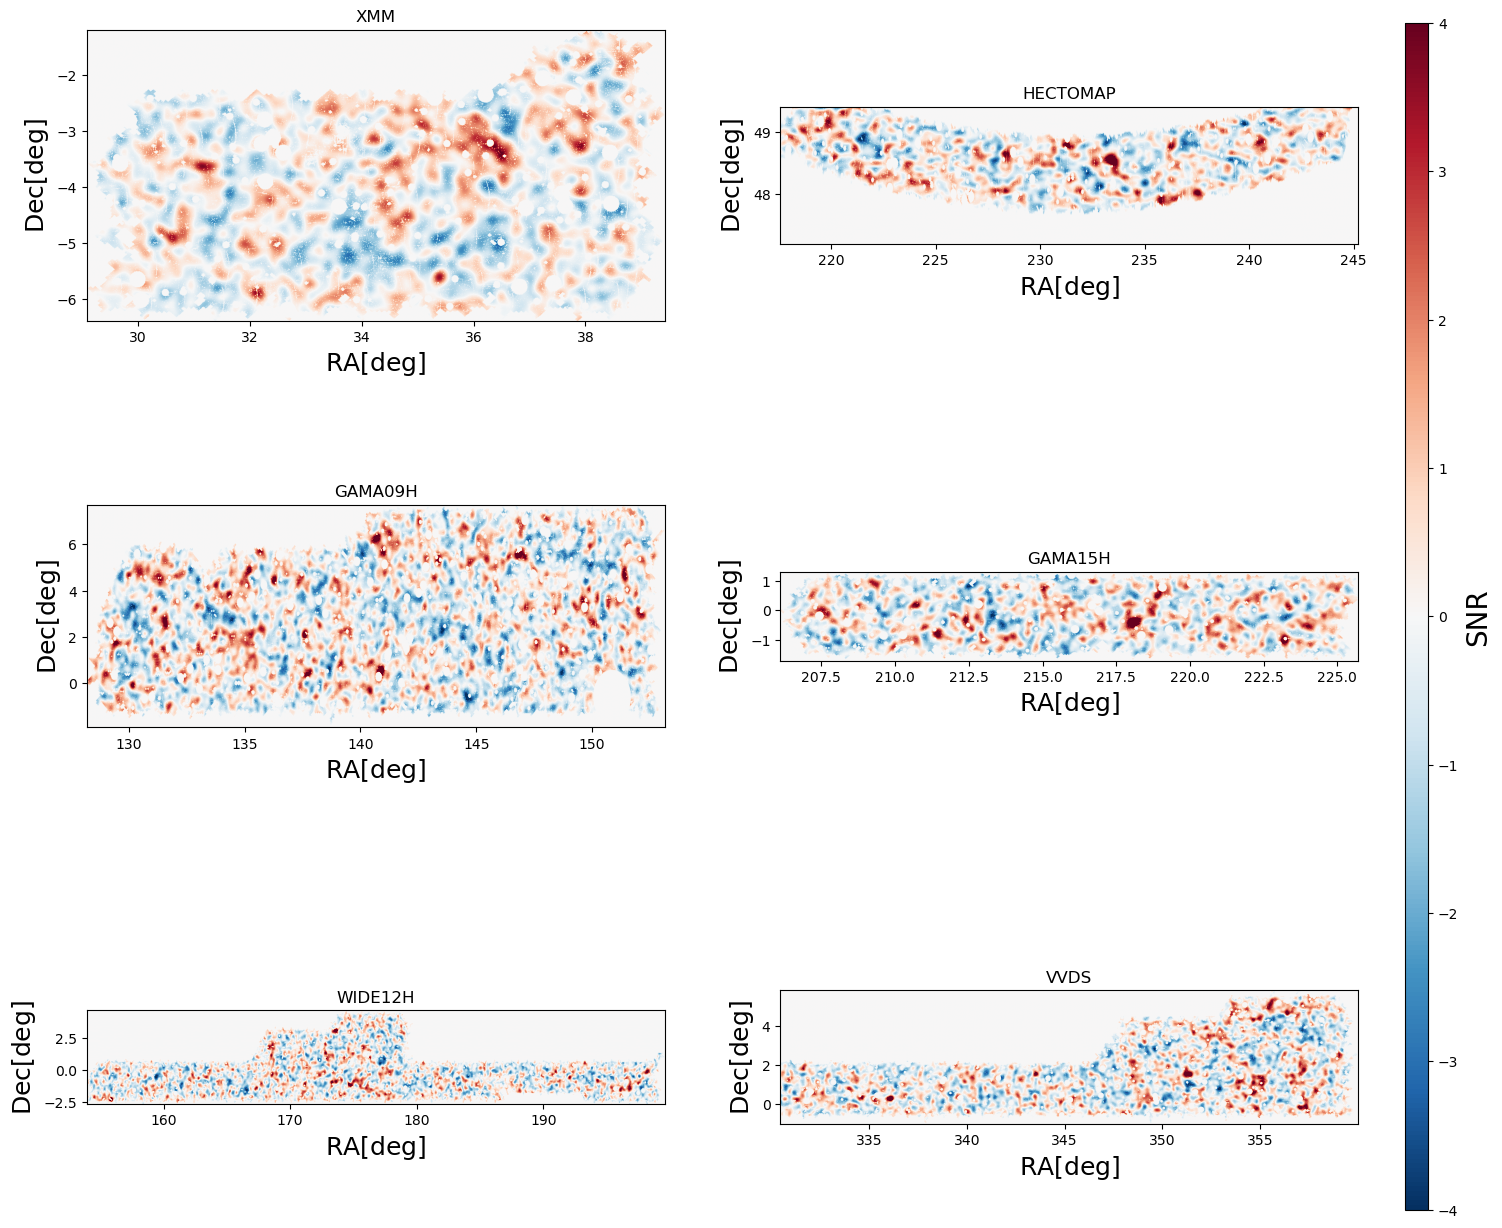

In [99]:
   
import matplotlib.cm as cm

images = []

fig, axs = plt.subplots(3,2,figsize=(20,15))
 
# axlist = [ax1,ax2,ax3,ax4,ax5,ax6]

images.append(axs[0,0].imshow(maps_all[0]/istds_all[0], origin='lower',extent=[x0s_min[0],x0s_max[0],x1s_min[0],x1s_max[0]],aspect=1,cmap= cm.RdBu_r, vmin= -4,vmax=4))
axs[0,0].set_xlabel(r'$\rm{RA [deg]}$',fontsize=18)
axs[0,0].set_ylabel(r'$\rm{Dec [deg]}$',fontsize=18)
axs[0,0].set_title('XMM')

images.append(axs[2,1].imshow(maps_all[1]/istds_all[1], origin='lower',extent=[x0s_min[1],x0s_max[1],x1s_min[1],x1s_max[1]],aspect=1,cmap= cm.RdBu_r, vmin=  -3,vmax= 3))
axs[2,1].set_xlabel(r'$\rm{RA [deg]}$',fontsize=18)
axs[2,1].set_ylabel(r'$\rm{Dec [deg]}$',fontsize=18)
axs[2,1].set_title('VVDS')


images.append(axs[1,0].imshow(maps_all[2]/istds_all[2], origin='lower',extent=[x0s_min[2],x0s_max[2],x1s_min[2],x1s_max[2]+3],aspect=1,cmap= cm.RdBu_r, vmin=  -3,vmax= 3))
axs[1,0].set_xlabel(r'$\rm{RA [deg]}$',fontsize=18)
axs[1,0].set_ylabel(r'$\rm{Dec [deg]}$',fontsize=18)
axs[1,0].set_title('GAMA09H')


images.append(axs[1,1].imshow(maps_all[3]/istds_all[3], origin='lower',extent=[x0s_min[3],x0s_max[3],x1s_min[3],x1s_max[3]],aspect=1.0,cmap= cm.RdBu_r, vmin=  -3,vmax= 3))
axs[1,1].set_xlabel(r'$\rm{RA [deg]}$',fontsize=18)
axs[1,1].set_ylabel(r'$\rm{Dec [deg]}$',fontsize=18)
axs[1,1].set_title('GAMA15H')

images.append(axs[2,0].imshow(maps_all[4]/istds_all[4], origin='lower',extent=[x0s_min[4],x0s_max[4],x1s_min[4]-1,x1s_max[4]],aspect=1,cmap= cm.RdBu_r, vmin=  -3,vmax= 3))
axs[2,0].set_xlabel(r'$\rm{RA [deg]}$',fontsize=18)
axs[2,0].set_ylabel(r'$\rm{Dec [deg]}$',fontsize=18)
axs[2,0].set_title('WIDE12H')



images.append(axs[0,1].imshow(maps_all[5]/istds_all[5], origin='lower',extent=[x0s_min[5]+5,x0s_max[5]-5,x1s_min[5]+5,x1s_max[5]+5],aspect=3,cmap= cm.RdBu_r,  vmin= -3,vmax= 3))
axs[0,1].set_xlabel(r'$\rm{RA [deg]}$',fontsize=18)
axs[0,1].set_ylabel(r'$\rm{Dec [deg]}$',fontsize=18)
axs[0,1].set_title('HECTOMAP')


# fig.colorbar(images[0], ax=axs, orientation='horizontal', fraction=.01)
fig.subplots_adjust(hspace = 0.01,bottom = 0.001)
cbar_ax = fig.colorbar(images[0], ax=axs.ravel().tolist(),shrink=0.90,pad=0.03,aspect=50)
cbar_ax.set_label(r"SNR", fontsize=20)
 
fig.savefig("/home/gabriela/Documents/Pesquisa/Utils_Amanda/figures//kappa_fields_HSC.pdf", bbox_inches='tight')
plt.show()

     